<div>
    <img src="pokemon.jpeg" height="1000">
</div>

# Introduction

Pokemon is a global icon to children and adults everywhere. It is a TV series that has expanded into video games, card games, movies, merchandise and everything inbetween. The motivation behind this analysis is to further understand the dynamics of the pokemon universe through data.

In this analysis, i'll explore the characteristics, strengths, and weaknesses of different Pokémon, analyze battle strategies, and gain insights into the world of Pokémon.

# Problem Statement

This analysis seeks to identify the strongest and balanced pokemons: Explore the dataset to identify the most strong and balanced Pokémons that trainers can use for battles.

# 📚 Imports

In [1]:
#Import the necessary libraries
import pandas as pd #It is used for processing as well as I/O

#for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 📖 Data Loading

In [2]:
#Load the dataset into a dataframe

df = pd.read_csv("pokemon.csv")

# 🧐 Data Inspection

In [3]:
#view the number of rows and columns

df.shape

(1194, 13)

In [4]:
#View the first five rows

df.head()

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [5]:
#View the last five rows

df.tail()

,Unnamed: 0,image_url,Id,Names,Type1,Type2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1189,1189,https://img.pokemondb.net/sprites/scarlet-viol...,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116
1190,1190,https://img.pokemondb.net/sprites/scarlet-viol...,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135
1191,1191,https://img.pokemondb.net/sprites/scarlet-viol...,1008,Miraidon,Electric,Dragon,670,100,85,100,135,115,135
1192,1192,https://img.pokemondb.net/sprites/scarlet-viol...,1009,Walking Wake,Water,Dragon,590,99,83,91,125,83,109
1193,1193,https://img.pokemondb.net/sprites/scarlet-viol...,1010,Iron Leaves,Grass,Psychic,590,90,130,88,70,108,104


## Variable Description

* Unnamed:0 : Column just like the index, but will be dropped since pandas creates an automatic index for each records
* Image_url: This column likely contains URLs or paths to images representing the Pokémon.
* Id: A unique identifier or index for each Pokémon.
* Names: The names of the Pokémon, indicating their individual identities.
* Type1: The primary type of each Pokémon, classifying them based on their elemental attributes.
* Type2: The secondary type of each Pokémon. Some Pokémon may have only one type, and in such cases, this column could contain null values.
* Total: The total base stats of each Pokémon, which is often used as a general indicator of a Pokémon's overall strength.
* HP (Hit Points): The health points or vitality of each Pokémon, reflecting their ability to withstand damage.
* Attack: The offensive power of each Pokémon, indicating their strength in physical attacks.
* Defense: The defensive capability of each Pokémon, representing their resistance to physical attacks.
* Sp. Atk (Special Attack): The Pokémon's proficiency in special or elemental attacks.
* Sp. Def (Special Defense): The Pokémon's ability to withstand special or elemental attacks.
* Speed: The speed attribute of each Pokémon, determining the order in which Pokémon take their turns in battles.

In [6]:
#View the columns present

df.columns

Index(['Unnamed: 0', 'image_url', 'Id', 'Names', 'Type1', 'Type2', 'Total',
       'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

In [7]:
#view the number of null values

df.isna().sum()

Unnamed: 0      0
image_url       0
Id              0
Names           0
Type1           0
Type2         542
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
dtype: int64

In [8]:
#View the duplicates present

df.duplicated().sum()

0

In [9]:
#View the summarized info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1194 non-null   int64 
 1   image_url   1194 non-null   object
 2   Id          1194 non-null   int64 
 3   Names       1194 non-null   object
 4   Type1       1194 non-null   object
 5   Type2       652 non-null    object
 6   Total       1194 non-null   int64 
 7   HP          1194 non-null   int64 
 8   Attack      1194 non-null   int64 
 9   Defense     1194 non-null   int64 
 10  Sp. Atk     1194 non-null   int64 
 11  Sp. Def     1194 non-null   int64 
 12  Speed       1194 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 121.4+ KB


In the Pokémon dataset, I found about 542 missing values in the Type2 column. I'm filling them with 'None' to show these Pokémon don't have a second type, I will removed the 'Unnamed' column since it's the same as the index, and also, i'll rename the columns making the dataset simpler and easier to explore.

# 🧽 Data Cleaning

In [10]:
# drop the unnamed column

df.drop(columns = "Unnamed: 0",inplace=True)

In [11]:
#fill the null values

df.Type2.fillna("None",inplace = True)

In [12]:
#Check if there is still null values

df.isna().sum()

image_url    0
Id           0
Names        0
Type1        0
Type2        0
Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
dtype: int64

In [13]:
#Create the new columns

new_columns = ['image_url', 'id', 'names', 'type1', 'type2', 'total', 'hp', 'attack',
       'defense', 'sp_atk', 'sp_def', 'speed']

In [14]:
#Change to the new column

df.columns = new_columns

In [15]:
# check the summarized info again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image_url  1194 non-null   object
 1   id         1194 non-null   int64 
 2   names      1194 non-null   object
 3   type1      1194 non-null   object
 4   type2      1194 non-null   object
 5   total      1194 non-null   int64 
 6   hp         1194 non-null   int64 
 7   attack     1194 non-null   int64 
 8   defense    1194 non-null   int64 
 9   sp_atk     1194 non-null   int64 
 10  sp_def     1194 non-null   int64 
 11  speed      1194 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 112.1+ KB


The null values have been removed, columns renamed and we have successfully dropped the column to be dropped. So, the data is clean and ready to be analyzed. Let's look at the patterns and connections in the dataset to find new insights.

# 🔍✨ Exploartory Data Analysis (EDA)

I'll begin by visulaizing the different types of pokeman in our dataset,i.e the type1 and type2

In [16]:
#View the dataframe

df

,image_url,id,names,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed
0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,https://img.pokemondb.net/sprites/sword-shield...,4,Charmander,Fire,None,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,https://img.pokemondb.net/sprites/scarlet-viol...,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116
1190,https://img.pokemondb.net/sprites/scarlet-viol...,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135
1191,https://img.pokemondb.net/sprites/scarlet-viol...,1008,Miraidon,Electric,Dragon,670,100,85,100,135,115,135
1192,https://img.pokemondb.net/sprites/scarlet-viol...,1009,Walking Wake,Water,Dragon,590,99,83,91,125,83,109


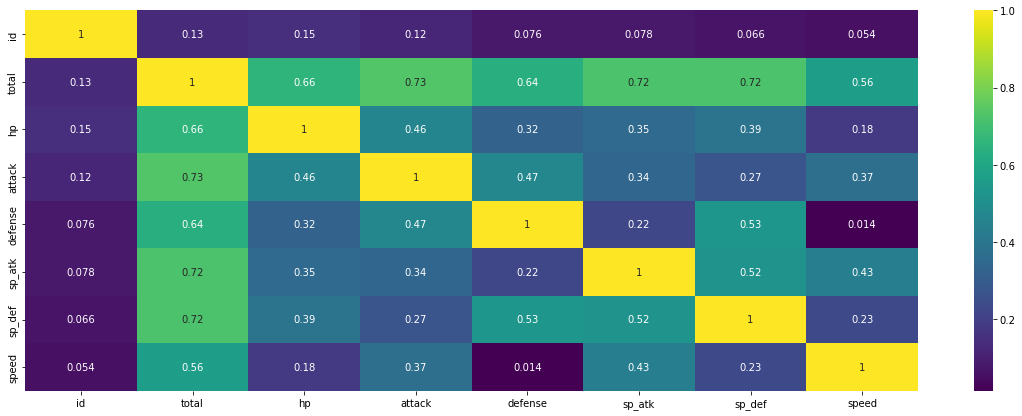

In [17]:
#Visualize the correlation of the dataframe

plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot = True,cmap='viridis')
plt.show()

* **Total vs HP**: 0.66
* **Total vs attack**: 0.73
* **Total vs defense**: 0.64
* **Total vs sp_atk**: 0.72
* **Total vs sp_def**: 0.72
* **Total vs speed**: 0.56

These correlations reveal how different attributes contribute to a Pokémon's overall strength (total base stats). The total base stat column with attack, special attack and special defensive attribute show strong positive correlations indicate that as either of them increases, the total stats also tend to increase. While the Total base stat with columns like Hit point, defense and speed show moderate positive correlation.

**Type 1**

In [18]:
#Get the numbering of each

y1 = df.type1.value_counts()
y1

Water       150
Normal      131
Grass       105
Bug          91
Psychic      82
Fire         75
Electric     73
Rock         67
Dark         56
Fighting     50
Dragon       49
Ghost        47
Ground       46
Poison       45
Ice          43
Steel        43
Fairy        31
Flying       10
Name: type1, dtype: int64

In [19]:
#get label

label1  = df.type1.value_counts().keys()

In [20]:
# explode the first one

#List to hold the explode value 
#explode value for the first
a = [0.2]
#explode value for the rest set at 0
b = [0 for i in range(len(y1)-1)]

#combine both list
myexplode1 = a+b
myexplode1

[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**Type 2**

In [21]:
#get the numbering of each

y2 = df.type2.value_counts()
y2

None        542
Flying      122
Psychic      49
Poison       47
Ground       43
Fairy        42
Fighting     41
Steel        40
Dragon       39
Ghost        37
Dark         33
Grass        33
Water        25
Ice          22
Fire         20
Rock         19
Normal       18
Electric     13
Bug           9
Name: type2, dtype: int64

In [22]:
#Create the label

label2 = df.type2.value_counts().keys()
label2

Index(['None', 'Flying', 'Psychic', 'Poison', 'Ground', 'Fairy', 'Fighting',
       'Steel', 'Dragon', 'Ghost', 'Dark', 'Grass', 'Water', 'Ice', 'Fire',
       'Rock', 'Normal', 'Electric', 'Bug'],
      dtype='object')

In [23]:
# explode the first one

#List to hold the explode value 
#explode value for the first
c = [0.05]
#explode value for the rest set at 0
d = [0 for i in range(len(y2)-1)]

#combine both list
myexplode2 = c+d
myexplode2

[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

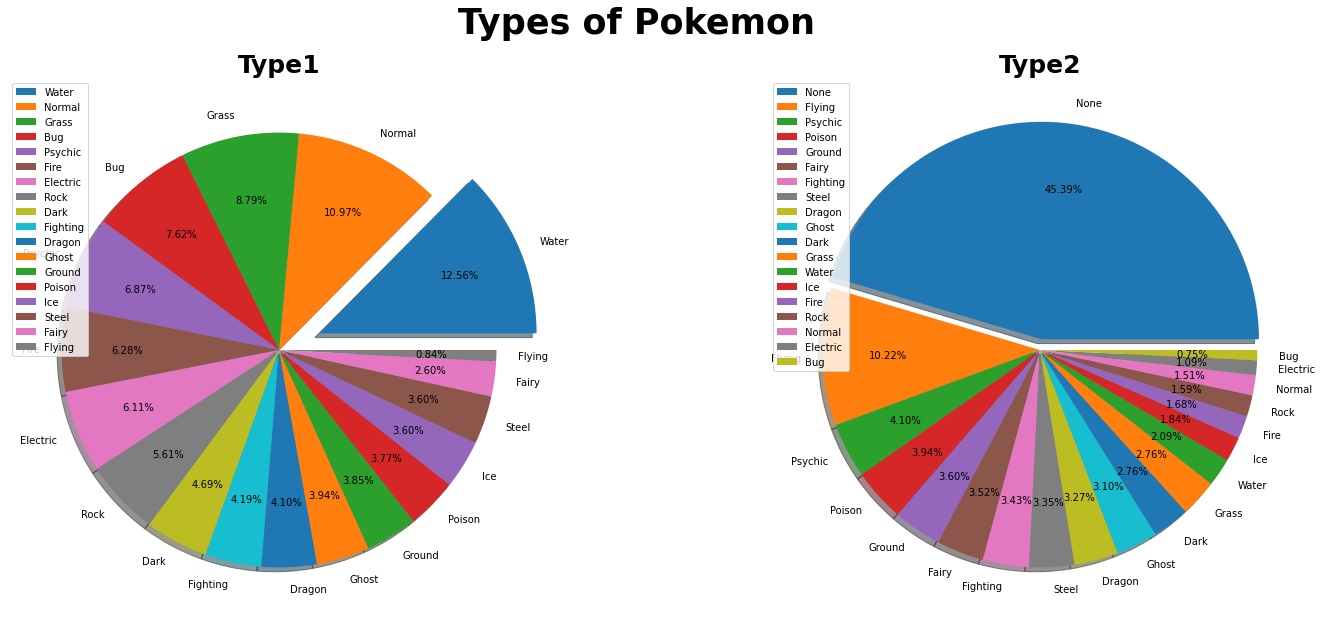

In [24]:
#figure size
plt.figure(figsize=(25,10))

#type1's plot

#create subplot
plt.subplot(1,2,1)
plt.pie(y1,labels=label1,explode = myexplode1,autopct="%1.2f%%",pctdistance=0.7,shadow=True)
plt.title("Type1",fontweight="bold",fontsize="25",loc="center")
plt.legend(loc ="best")

#type2's plot
plt.subplot(1,2,2)
plt.pie(y2,labels=label2,explode = myexplode2,autopct="%1.2f%%",pctdistance=0.7,shadow=True)
plt.suptitle("Types of Pokemon",fontweight="bold",fontsize="35")
plt.title("Type2",fontweight="bold",fontsize="25",loc="center")
plt.legend(loc ="best")

#display plot
plt.show()

In the Pokémon universe, Water-type Pokémon rule the charts, claiming a whopping 12.56% of all creatures. It's clear trainers are drawn to the aquatic allure. On the flip side, the skies are less crowded, with Flying types making up only 0.84%—a rare and majestic breed indeed.

Turning to secondary types i.e type 2, a significant 45.39% of Pokémon rock a single element. Flying takes the lead here at 10.22%, dominating the skies. Meanwhile, Bug types flutter at just 0.75%, making them the least common secondary element. So, in the diverse world of Pokémon, Water reigns supreme, Flying soars high, and Bug maintains its subtle charm.

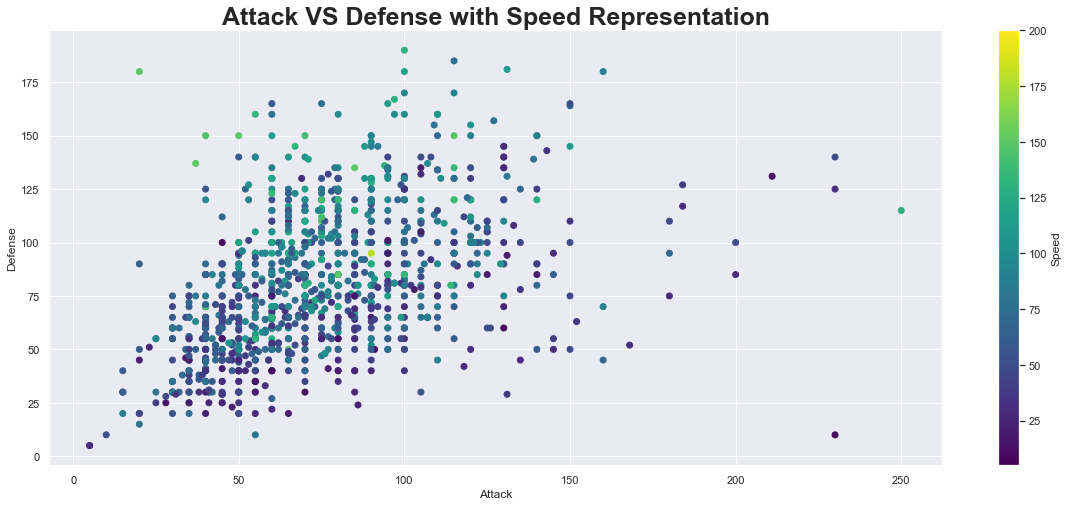

In [25]:
#Attack vs Defense with Speed

sns.set()
plt.figure(figsize=(20,8))
plt.scatter(x=df['defense'],y=df['attack'],c=df['speed'],cmap='viridis')
plt.colorbar(label = 'Speed')
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.title("Attack VS Defense with Speed Representation",fontweight='bold',fontsize='25')
plt.show()

This plot highlights that Pokémon with higher speed, allowing them to take the first turns in battles, often exhibit lower attack strength and average resistance to attacks. This observation suggests the need for additional analysis to identify Pokémon that strike a more balanced combination of all other stats.

Which pokemon top's the chart based on overall stat?

In [26]:
#sort the dataframe by total base stat

top20 = df.sort_values(by="total").tail(20)[["names","total"]]
top20

,names,total
312,Tyranitar Mega Tyranitar,700
1056,Zamazenta Crowned Shield,700
1054,Zacian Crowned Sword,700
462,Metagross Mega Metagross,700
458,Salamence Mega Salamence,700
867,Diancie Mega Diancie,700
467,Latias Mega Latias,700
545,Garchomp Mega Garchomp,700
777,Kyurem Black Kyurem,700
776,Kyurem White Kyurem,700


In [27]:
#Function for horizontal bar

def barh(fig_color,ax_color,x,y,my_height,my_color,my_title,title_coord,my_fontsize):
    plt.figure(figsize=(9,10),facecolor = fig_color)
    plt.barh(x,y,height=my_height,color=my_color)

    #Get current axis and change background color
    plt.gca().set_facecolor(ax_color)

    # Turn off spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    # Turn off ticks
    plt.tick_params(axis='both', length=0)

    plt.title(my_title,x = title_coord,fontweight='bold',fontsize=my_fontsize)
    plt.show()

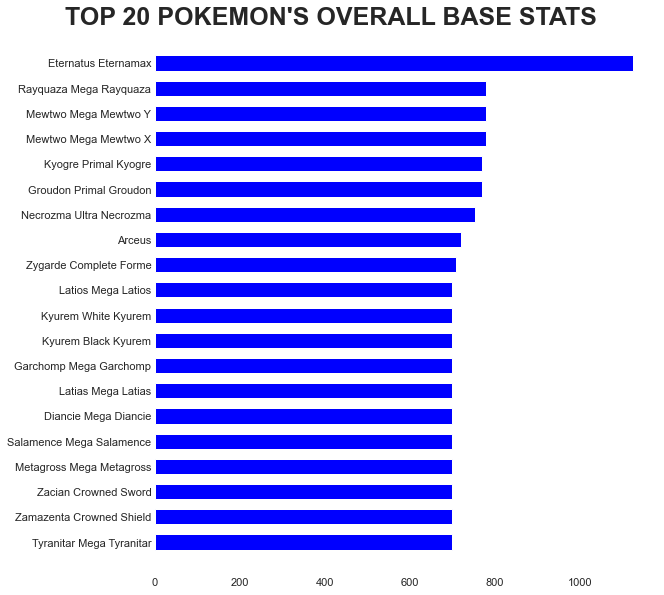

In [28]:
#Call the function

barh("#ffff","#ffff",top20["names"],top20["total"],0.6,"blue","TOP 20 POKEMON'S OVERALL BASE STATS",0.35,'25')

In the Pokémon world, Eternatus Eternamax has the highest overall stat among the top 20. But here's the twist: the last eleven have the same stats, showing that being strong isn't just about numbers.

Now, let's look at what really makes a Pokémon powerful in battles—like having versatile moves, type advantages, and smart strategies. It's not just about being super strong; it's about using different skills and clever plans to be the best. We can start by analyzing those with two elemental powers and those with only one elemental power.

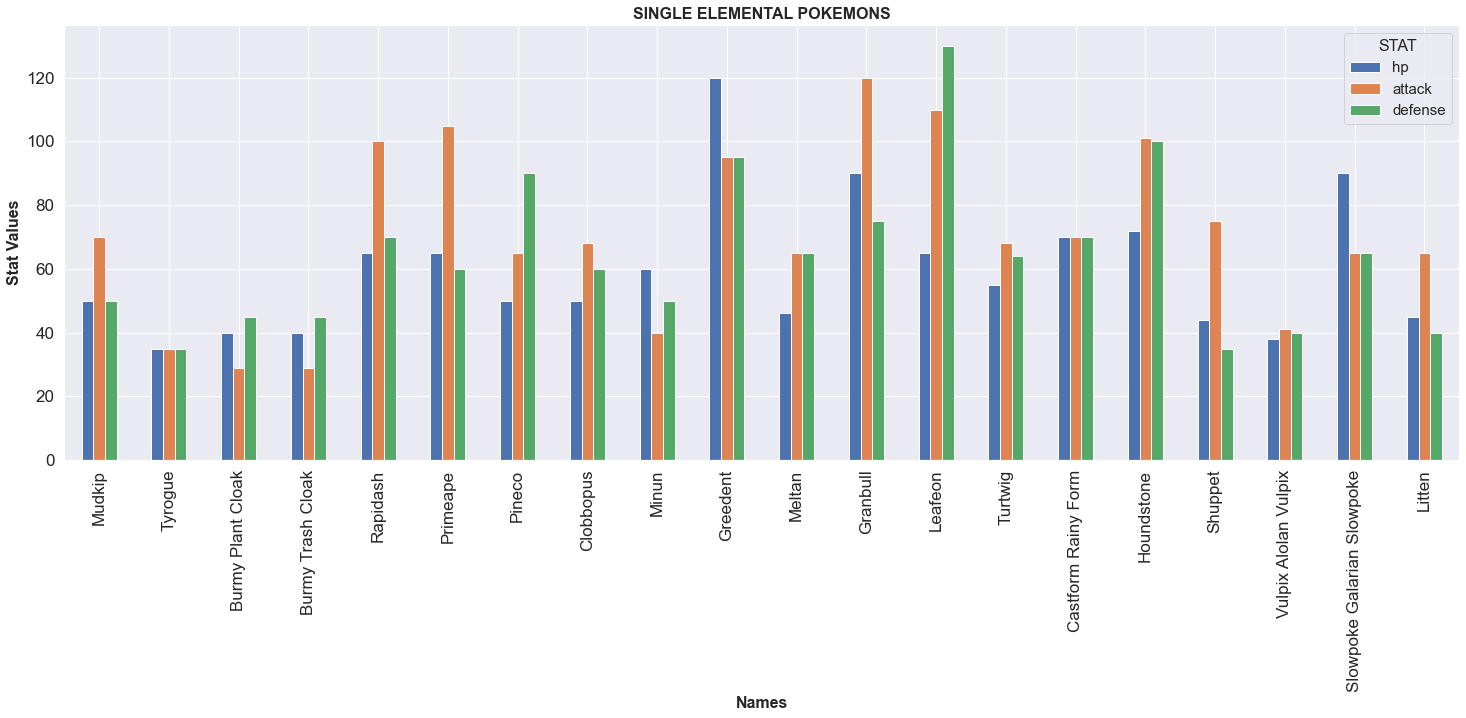

In [29]:
#Select only pokemon's with one elemental power
one_type_df = df[df.type2=='None']

#Select only pokemon's with one elemental power
one_type = one_type_df[['names','hp','attack','defense']].set_index('names')

#Making plot from 20 samples
one_type.sample(20).plot(kind='bar',figsize=(25,8),fontsize=17)
plt.title("SINGLE ELEMENTAL POKEMONS",fontweight='bold',fontsize='16')
plt.xlabel('Names',fontweight='bold',fontsize='16')
plt.ylabel('Stat Values',fontweight='bold',fontsize='16')
plt.legend(title='STAT',fontsize=15,title_fontsize=16)
plt.show()

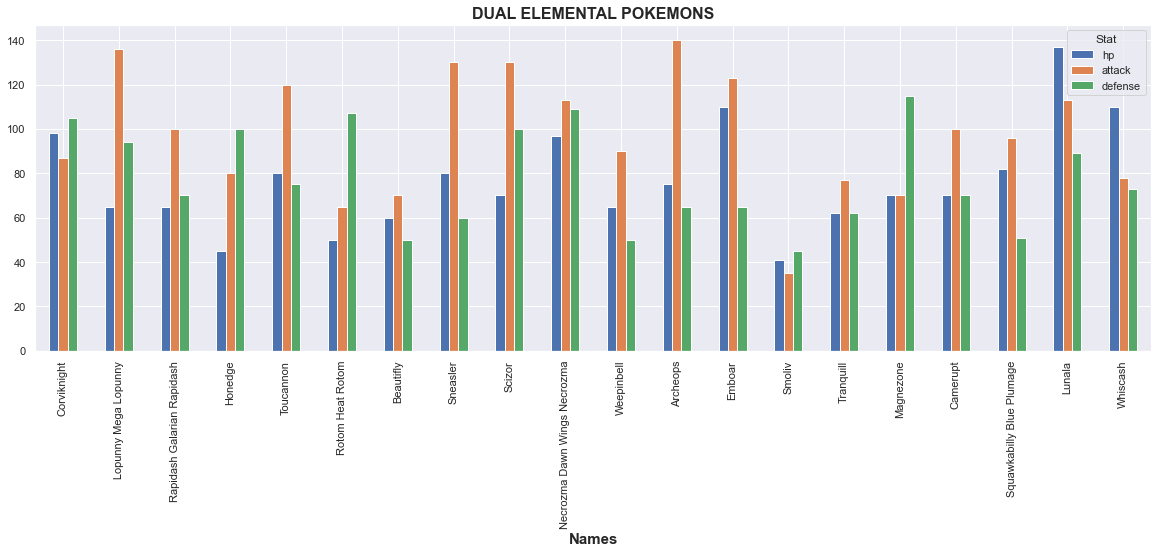

In [30]:
#Selecting pokemon's with two elemental power
two_types_df = df[df.type2!='None']

two_types= two_types_df[['names','hp','attack','defense']].set_index('names')

#Plotting 20 random samples
two_types.sample(20).plot(kind='bar',figsize=(20,6))
plt.title("DUAL ELEMENTAL POKEMONS",fontweight='bold',fontsize='16')
plt.xlabel('Names',fontweight='bold',fontsize=15)
plt.legend(title='Stat')
plt.show()

The story unfolds clearly in the plots: Pokémon with dual elemental powers boast superior stats compared to their single-type counterparts. The strategic advantage is evident — imagine facing a water Pokémon with just a grass attack; defeat seems inevitable. Having a blend of types not only diversifies your moves but alters your stats, providing a multitude of advantages over those with a single elemental prowess.

In subsequent analysis, we will stick with the dataset of pokemons with dual elemental powers

In [31]:
#Display the dataframe

two_types_df

,image_url,id,names,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed
0,https://img.pokemondb.net/sprites/sword-shield...,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,https://img.pokemondb.net/sprites/sword-shield...,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,https://img.pokemondb.net/sprites/sword-shield...,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
6,https://img.pokemondb.net/sprites/sword-shield...,6,Charizard,Fire,Flying,534,78,84,78,109,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...
1189,https://img.pokemondb.net/sprites/scarlet-viol...,1006,Iron Valiant,Fairy,Fighting,590,74,130,90,120,60,116
1190,https://img.pokemondb.net/sprites/scarlet-viol...,1007,Koraidon,Fighting,Dragon,670,100,135,115,85,100,135
1191,https://img.pokemondb.net/sprites/scarlet-viol...,1008,Miraidon,Electric,Dragon,670,100,85,100,135,115,135
1192,https://img.pokemondb.net/sprites/scarlet-viol...,1009,Walking Wake,Water,Dragon,590,99,83,91,125,83,109


In [32]:
#Filter the speed

speed = two_types_df[two_types_df['speed']>two_types_df['speed'].mean()].sort_values(by='speed')

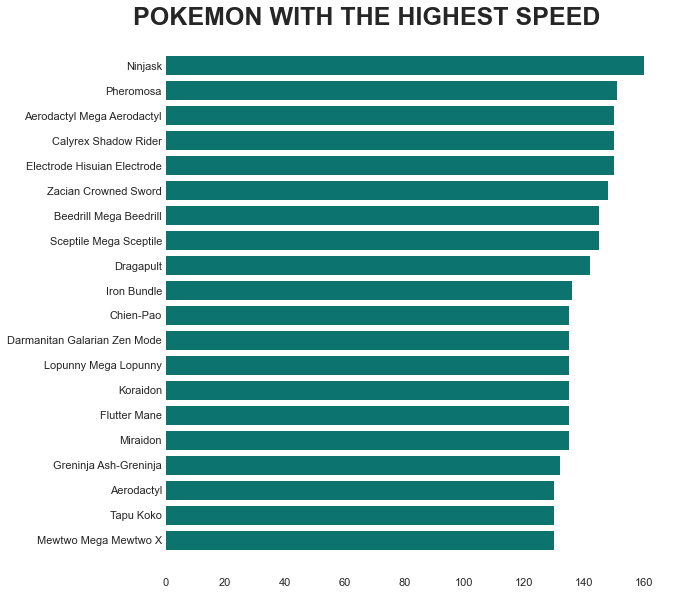

In [33]:
#plot the speed

barh("#ffff","#ffff",speed["names"].tail(20),speed["speed"].tail(20),0.8,"#0d736f","POKEMON WITH THE HIGHEST SPEED",0.4,'25')

In [34]:
#Filter the defense

defense = two_types_df[two_types_df['defense']>two_types_df['defense'].mean()].sort_values(by='defense')

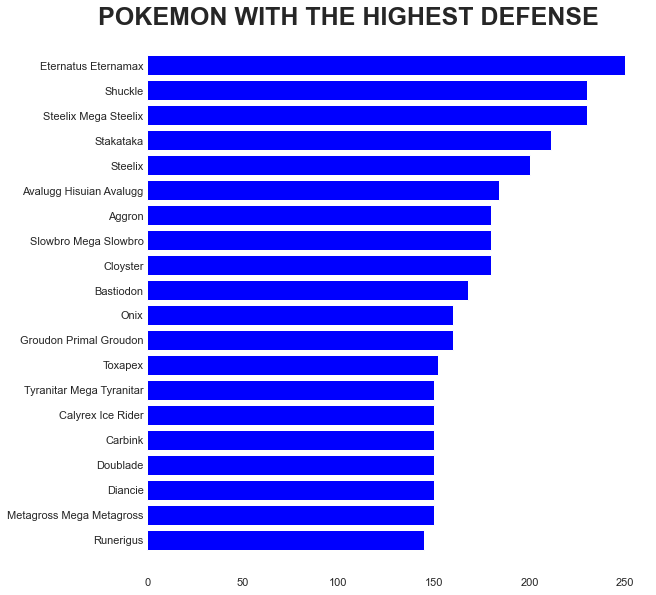

In [35]:
#Plot the defense

barh("#ffff","#ffff",defense["names"].tail(20),defense["defense"].tail(20),0.8,"blue","POKEMON WITH THE HIGHEST DEFENSE",0.4,'25')

In [36]:
#Filter the attack

attack = two_types_df[two_types_df['attack']>two_types_df['attack'].mean()].sort_values(by='attack')

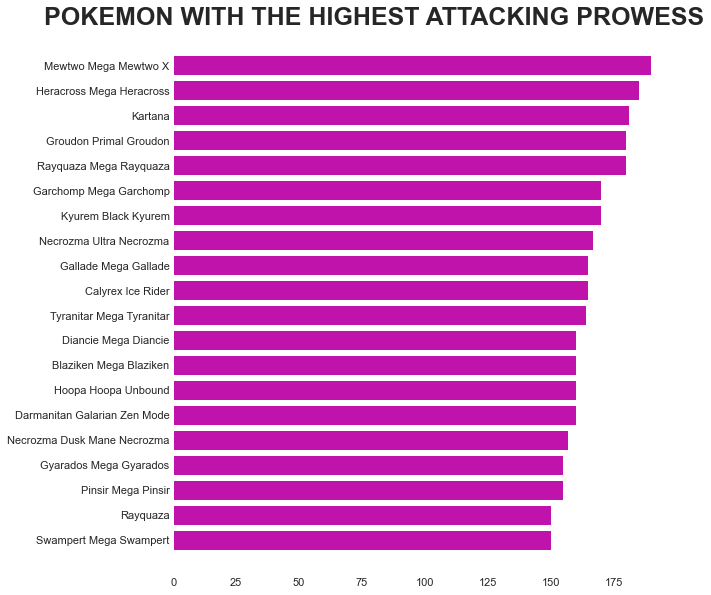

In [37]:
#Display the defense

barh("#ffff","#ffff",attack["names"].tail(20),attack["attack"].tail(20),0.8,"#bf13ab","POKEMON WITH THE HIGHEST ATTACKING PROWESS",0.4,'25')

In [38]:
#filter the hit points

hp = two_types_df[two_types_df['hp']>two_types_df['hp'].mean()].sort_values(by='hp')

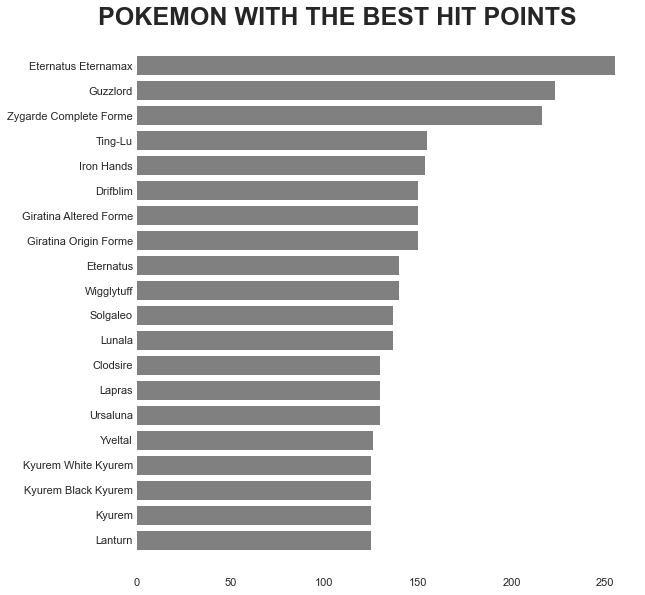

In [39]:
#Display the hit points

barh("#ffff","#ffff",hp["names"].tail(20),hp["hp"].tail(20),0.8,"#808080","POKEMON WITH THE BEST HIT POINTS",0.4,'25')

Observing the plots, it becomes evident that only a couple of Pokémon occur twice, highlighting the inadequacy of relying on a single statistic to accurately depict the most balanced Pokémon. Recognizing this, I proceeded to merge the new dataframe, aiming to gain a more comprehensive understanding of their stats. Subsequently, I plotted the combined statistics, unveiling each Pokémon's overall strengths and weaknesses

In [40]:
#Concatenate the new dataframes

new_df = pd.concat([speed.tail(10),defense.tail(10),attack.tail(10),hp.tail(10)])

In [41]:
new_df

,image_url,id,names,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed
1173,https://img.pokemondb.net/sprites/scarlet-viol...,991,Iron Bundle,Ice,Water,570,56,80,114,124,60,136
1052,https://img.pokemondb.net/sprites/sword-shield...,887,Dragapult,Dragon,Ghost,600,88,120,75,100,75,142
319,https://img.pokemondb.net/sprites/sword-shield...,254,Sceptile Mega Sceptile,Grass,Dragon,630,70,110,75,145,85,145
19,https://img.pokemondb.net/sprites/sword-shield...,15,Beedrill Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145
1054,https://img.pokemondb.net/sprites/sword-shield...,888,Zacian Crowned Sword,Fairy,Steel,700,92,150,115,80,115,148
136,https://img.pokemondb.net/sprites/scarlet-viol...,101,Electrode Hisuian Electrode,Electric,Grass,490,60,50,70,80,80,150
1069,https://img.pokemondb.net/sprites/sword-shield...,898,Calyrex Shadow Rider,Psychic,Ghost,680,100,85,80,165,100,150
189,https://img.pokemondb.net/sprites/sword-shield...,142,Aerodactyl Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150
953,https://img.pokemondb.net/sprites/sword-shield...,795,Pheromosa,Bug,Fighting,570,71,137,37,137,37,151
361,https://img.pokemondb.net/sprites/sword-shield...,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160


In [42]:
#view the duplicates

new_df.duplicated().sum()

1

In [43]:
#Remove duplicates

new_df.drop_duplicates(keep='first',inplace=True)

In [44]:
#Set the index to the names

new_df.set_index('names',inplace=True)

In [45]:
#Check if there still exist duplicates

new_df.duplicated().sum()

0

In [46]:
#Get the shape

new_df.shape

(39, 11)

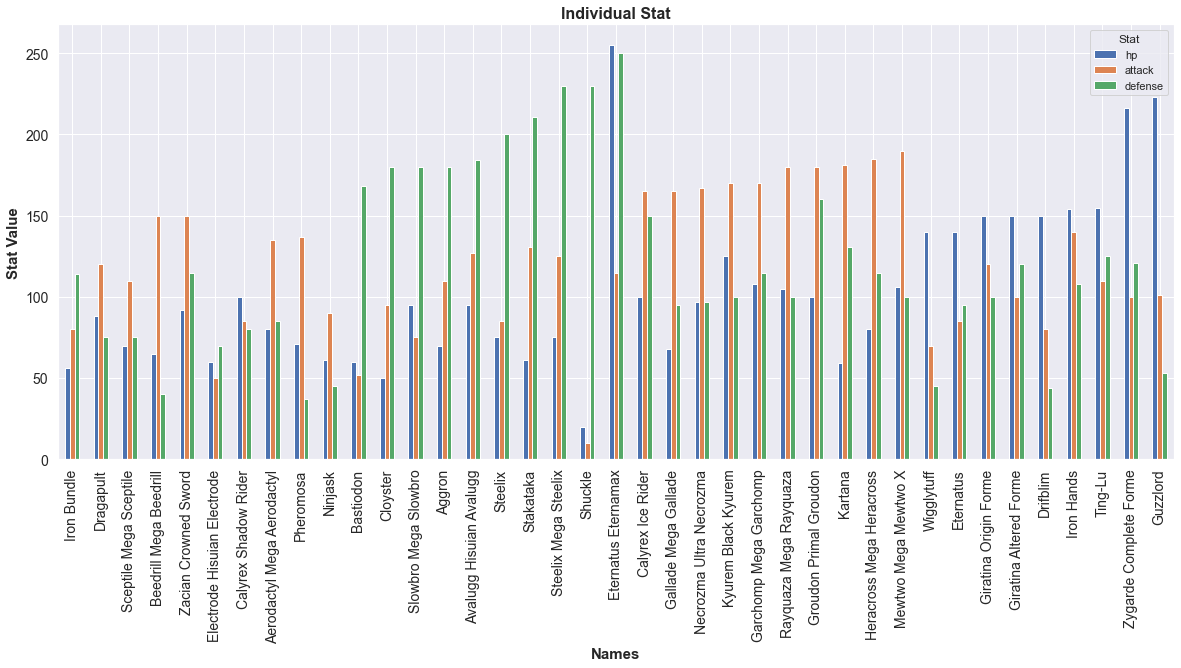

In [47]:
#plot the Stat of the Pokemons in the new dataframe

new_df[['hp','attack','defense']].plot(kind='bar',figsize=(20,8),fontsize=14)
plt.title("Individual Stat",fontweight='bold',fontsize='16')
plt.xlabel('Names',fontweight='bold',fontsize=15)
plt.ylabel("Stat Value",fontweight='bold',fontsize=15)
plt.legend(title='Stat')
plt.show()

The plot sheds light on Shuckle, showcasing its formidable defensive capabilities while revealing below-average hit points and attack strength. This implies that Shuckle may face challenges when both launching powerful attacks and enduring strikes from well-rounded Pokémon. Subsequently, I filtered the dataframe to focus solely on Pokémon with at least average values in each stat.

These selected Pokémon can be deemed strong and balanced, possessing a well-rounded combination of the whole stat. This strategic filtering aims to identify Pokémon with a balanced prowess, excelling both in offense and defense on the battlefield.

In [48]:
#View the statistical info of the data

df.describe()

,id,total,hp,attack,defense,sp_atk,sp_def,speed
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000
mean,492.746231,441.206868,70.883585,80.948911,74.587102,72.881072,72.123953,69.782245
std,293.719541,121.015326,26.861740,32.126164,30.678626,32.702411,27.628412,30.200828
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,235.250000,330.000000,52.000000,56.000000,51.250000,50.000000,50.000000,45.000000
50%,486.500000,460.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,741.750000,520.000000,85.000000,100.000000,90.000000,95.000000,90.000000,90.750000
max,1010.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [49]:
#Filter the dataframe

filtered_df = new_df[(new_df['hp'] >= df['hp'].mean())& (new_df['attack'] >= df['attack'].mean()) & (new_df['defense'] >= df['defense'].mean()) & (new_df['speed'] >= df['speed'].mean()) & (new_df['sp_atk'] >= df['sp_atk'].mean())]

In [50]:
filtered_df

,image_url,id,type1,type2,total,hp,attack,defense,sp_atk,sp_def,speed
names,,,,,,,,,,,
Dragapult,https://img.pokemondb.net/sprites/sword-shield...,887,Dragon,Ghost,600,88,120,75,100,75,142
Zacian Crowned Sword,https://img.pokemondb.net/sprites/sword-shield...,888,Fairy,Steel,700,92,150,115,80,115,148
Calyrex Shadow Rider,https://img.pokemondb.net/sprites/sword-shield...,898,Psychic,Ghost,680,100,85,80,165,100,150
Eternatus Eternamax,https://img.pokemondb.net/sprites/sword-shield...,890,Poison,Dragon,1125,255,115,250,125,250,130
Necrozma Ultra Necrozma,https://img.pokemondb.net/sprites/sword-shield...,800,Psychic,Dragon,754,97,167,97,167,97,129
Kyurem Black Kyurem,https://img.pokemondb.net/sprites/sword-shield...,646,Dragon,Ice,700,125,170,100,120,90,95
Garchomp Mega Garchomp,https://img.pokemondb.net/sprites/sword-shield...,445,Dragon,Ground,700,108,170,115,120,95,92
Rayquaza Mega Rayquaza,https://img.pokemondb.net/sprites/sword-shield...,384,Dragon,Flying,780,105,180,100,180,100,115
Groudon Primal Groudon,https://img.pokemondb.net/sprites/sword-shield...,383,Ground,Fire,770,100,180,160,150,90,90


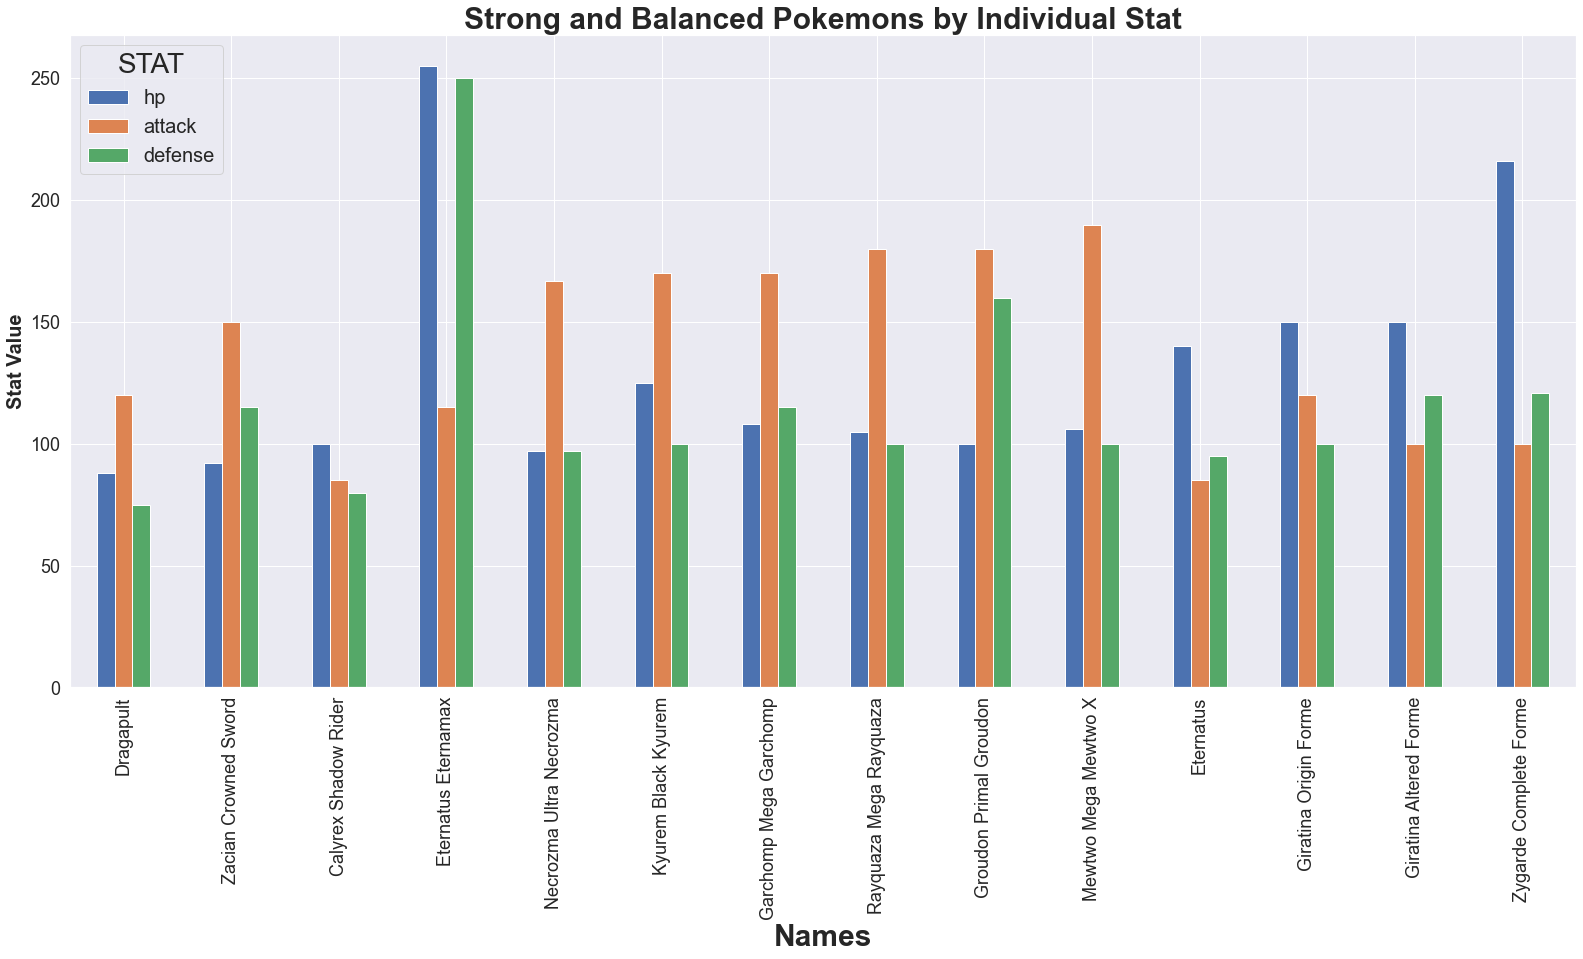

In [51]:
#Plot the filtered stat

filtered_df[['hp','attack','defense']].plot(kind='bar',figsize=(27,12),fontsize=18)
plt.title("Strong and Balanced Pokemons by Individual Stat",fontweight='bold',fontsize='30')
plt.xlabel('Names',fontweight='bold',fontsize=30)
plt.ylabel("Stat Value",fontweight='bold',fontsize=20)
plt.legend(title='STAT',title_fontsize='28',fontsize='20')
plt.show()

## Inference


In the Pokémon realm, a select group stands out as the epitome of balance and strength. After filtering the data to include only those Pokémon with at least the average hit points, attack, and defense, names like 'Groudon Primal Groudon', 'Zygrade Complete Forme' and 'Mewtwo Mega Mewtwo X' among others, emerge as the shining examples of well-rounded prowess. Their hit points, attack, and defense stats surpass the average, showcasing a harmonious balance that makes them formidable contenders on the battlefield.

Surprisingly, even in this elite group, the best by total base stat 'Eternatus Eternamax' stands tall. With a staggering total base stat, surpassing all others, Eternatus not only maintains balance but ascends to the pinnacle of strength. This revelation positions Eternatus Eternamax as a beacon of power and balance—a Pokémon that not only boasts exceptional overall strength but also embodies a strategic and harmonious combination of hit points, attack, and defense. For trainers seeking a Pokémon investment that promises victories in battles, Eternatus Eternamax proves to be an exceptional and well-balanced choice, ready to leave a mark in the Pokémon world.


# Conclusion

In summary, our look into the Pokémon data gives us some interesting findings about what makes a Pokémon strong in battles. Pokémon with two elemental powers seem to perform better overall than those with just one. When we checked the top 20 Pokémon in speed, defense, attack, and hit points, we saw that trainers have varied preferences.


To help choose a balanced Pokémon, we used an approach based on average values for key traits. This ensures that Pokémon are well-rounded and can stand their ground in battles. The analysis highlights the importance of considering different factors when figuring out a Pokémon's strength, giving trainers a full picture for making strategic decisions in team-building and competitions.